# Imports

In [1]:
from tensorflow import keras
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

# Data load and normalization

In [2]:
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step


In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

# Model build and graph

In [5]:
def build_model(hidden_units=28*28, use_dropout=False, use_bn=False):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28, 1)))
    model.add(keras.layers.Dense(hidden_units, activation="relu"))

    if use_bn:
        model.add(keras.layers.BatchNormalization())

    if use_dropout:
        model.add(keras.layers.Dropout(0.5))

    model.add(keras.layers.Dense(10, activation="softmax"))
    return model


def train_and_evaluate(
    model,
    train_data,
    train_labels,
    test_data,
    test_labels,
    epochs=10,
    lr=0.001,
    batch_size=32,
):
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    history = model.fit(
        train_data,
        train_labels,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(test_data, test_labels),
        verbose=0,
    )

    test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=0)
    return history, test_loss, test_acc

In [6]:
def plot_results(history, title):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Test Accuracy")
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Test Loss")
    plt.title(f"{title} - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

# Experiments

In [7]:
global_epochs = 50
global_lr = 0.001

## Exp: 1

d:\PyInterpreters\Big_data\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test accuracy with 5 epochs: 0.8825


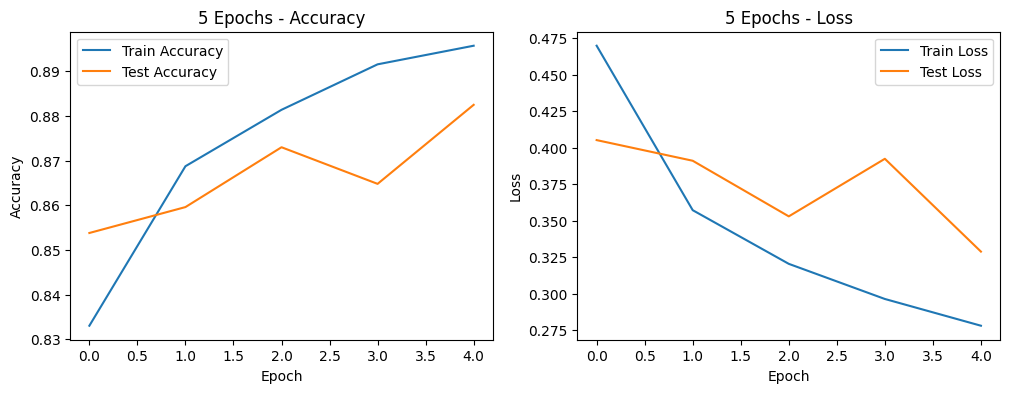

Test accuracy with 50 epochs: 0.8958


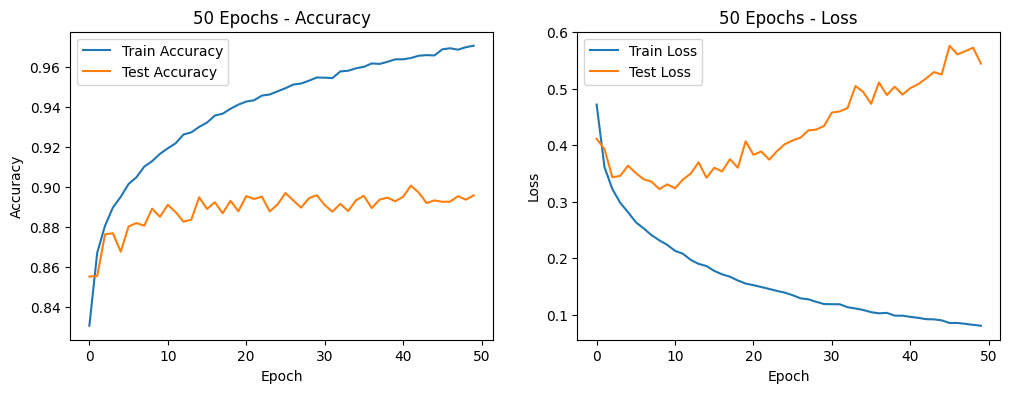

In [8]:
# Малое число эпох
model_small_epochs = build_model()
history_small, loss_small, acc_small = train_and_evaluate(
    model_small_epochs,
    train_images,
    train_labels,
    test_images,
    test_labels,
    epochs=5,
    lr=global_lr,
)
print(f"Test accuracy with 5 epochs: {acc_small:.4f}")
plot_results(history_small, "5 Epochs")

# Большое число эпох
model_large_epochs = build_model()
history_large, loss_large, acc_large = train_and_evaluate(
    model_large_epochs,
    train_images,
    train_labels,
    test_images,
    test_labels,
    epochs=global_epochs,
    lr=global_lr,
)
print(f"Test accuracy with 50 epochs: {acc_large:.4f}")
plot_results(history_large, "50 Epochs")

## Вывод

Пошло сильное переобучение, при этом точность увеличилась не сильно

## Exp: 2

Test accuracy with small LR (0.0001): 0.8945


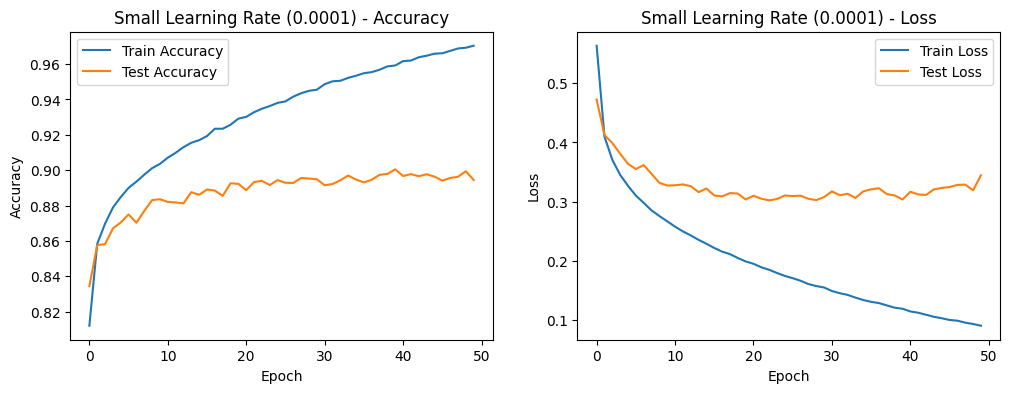

Test accuracy with large LR (0.1): 0.2504


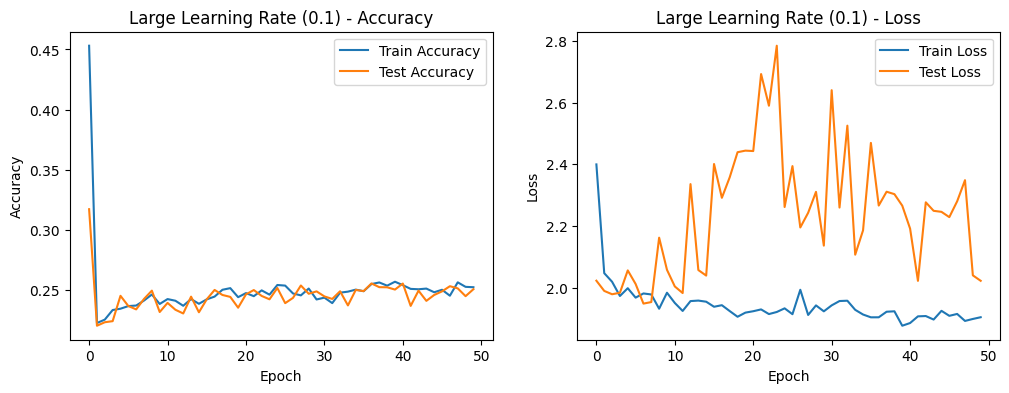

In [9]:
# Маленький learning rate
model_small_lr = build_model()
history_small_lr, loss_small_lr, acc_small_lr = train_and_evaluate(
    model_small_lr,
    train_images,
    train_labels,
    test_images,
    test_labels,
    epochs=global_epochs,
    lr=0.0001,
)
print(f"Test accuracy with small LR (0.0001): {acc_small_lr:.4f}")
plot_results(history_small_lr, "Small Learning Rate (0.0001)")

# Большой learning rate
model_large_lr = build_model()
history_large_lr, loss_large_lr, acc_large_lr = train_and_evaluate(
    model_large_lr,
    train_images,
    train_labels,
    test_images,
    test_labels,
    epochs=global_epochs,
    lr=0.1,
)
print(f"Test accuracy with large LR (0.1): {acc_large_lr:.4f}")
plot_results(history_large_lr, "Large Learning Rate (0.1)")

## Вывод

Низкий LR - сила!

Но если пожадничать, то можно встретить локальный минимум

## Exp: 3

Test accuracy without Dropout: 0.8914


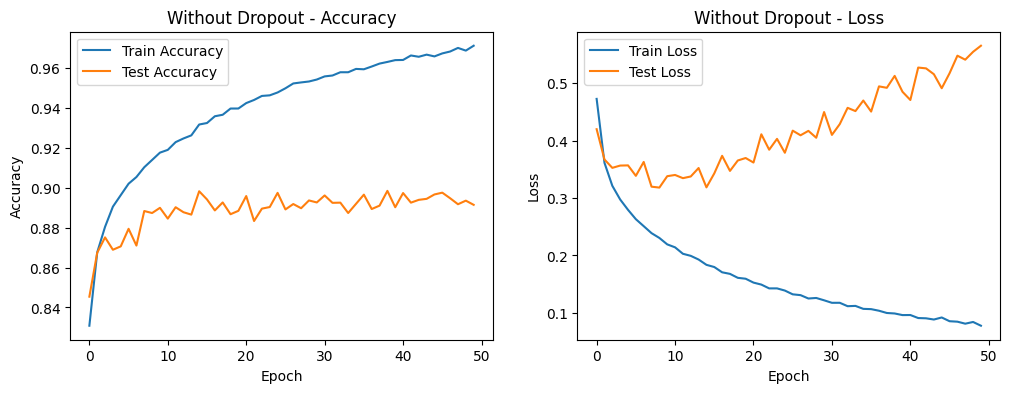

Test accuracy with Dropout: 0.8900


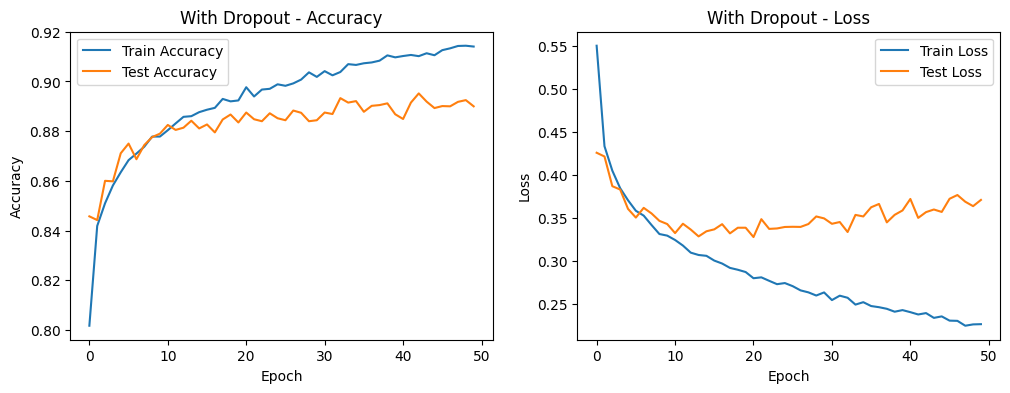

In [10]:
# Без Dropout
model_no_dropout = build_model(use_dropout=False)
history_no_dropout, loss_no_dropout, acc_no_dropout = train_and_evaluate(
    model_no_dropout,
    train_images,
    train_labels,
    test_images,
    test_labels,
    epochs=global_epochs,
    lr=global_lr,
)
print(f"Test accuracy without Dropout: {acc_no_dropout:.4f}")
plot_results(history_no_dropout, "Without Dropout")

# С Dropout
model_with_dropout = build_model(use_dropout=True)
history_with_dropout, loss_with_dropout, acc_with_dropout = train_and_evaluate(
    model_with_dropout,
    train_images,
    train_labels,
    test_images,
    test_labels,
    epochs=global_epochs,
    lr=global_lr,
)
print(f"Test accuracy with Dropout: {acc_with_dropout:.4f}")
plot_results(history_with_dropout, "With Dropout")

## Вывод

Сильно улучшился loss за счёт незначительной потери в точности => борьба с переобучением

## Exp: 4

Test accuracy without BatchNorm: 0.8913


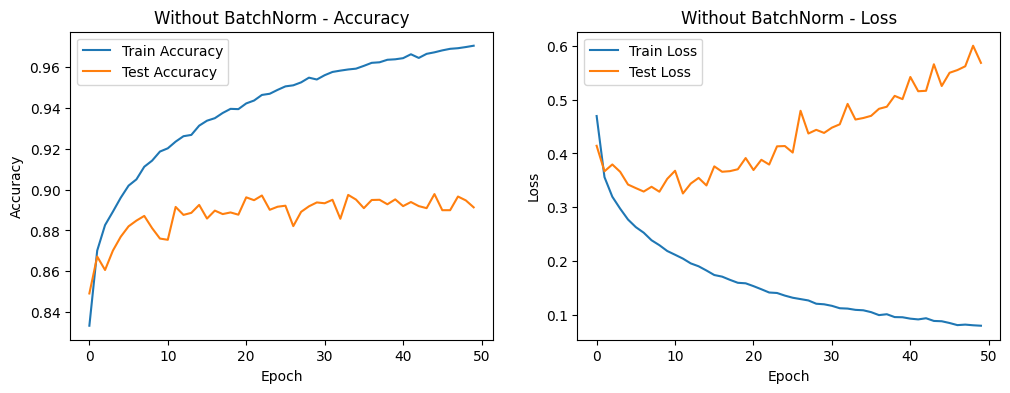

Test accuracy with BatchNorm: 0.8806


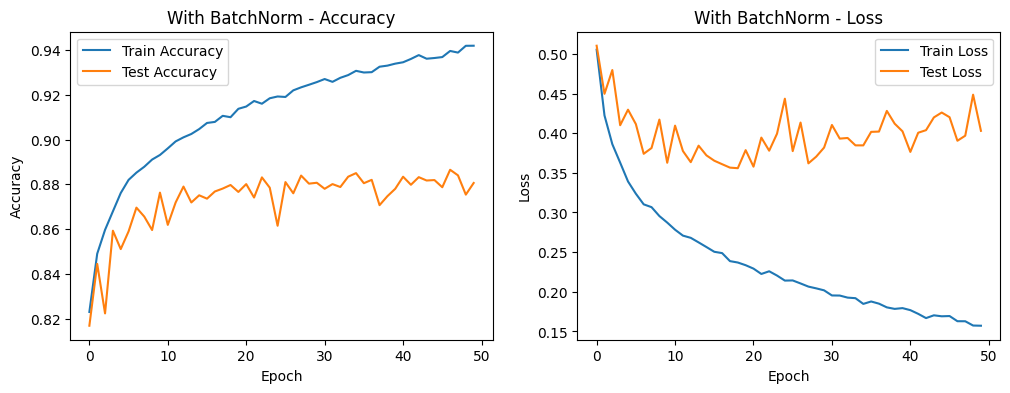

In [11]:
# Без BatchNorm
model_no_bn = build_model(use_bn=False)
history_no_bn, loss_no_bn, acc_no_bn = train_and_evaluate(
    model_no_bn,
    train_images,
    train_labels,
    test_images,
    test_labels,
    epochs=global_epochs,
    lr=global_lr,
)
print(f"Test accuracy without BatchNorm: {acc_no_bn:.4f}")
plot_results(history_no_bn, "Without BatchNorm")

# С BatchNorm
model_with_bn = build_model(use_bn=True)
history_with_bn, loss_with_bn, acc_with_bn = train_and_evaluate(
    model_with_bn,
    train_images,
    train_labels,
    test_images,
    test_labels,
    epochs=global_epochs,
    lr=global_lr,
)
print(f"Test accuracy with BatchNorm: {acc_with_bn:.4f}")
plot_results(history_with_bn, "With BatchNorm")

## Вывод

Сглаживает график обучения. 

Ускоряет обучение.

Потенциально может улучшить точность (с BatchNorm точность продолжила расти на момент 30-й итерации, а loss - начала стагнировать. Следовательно можно попробовать брать больше эпох)